# ANALYZ OF MEDICAL DATA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("medical_examination.csv")

## Data Summary

In [3]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.shape

(70000, 13)

## Adding overweight column based on height and weight variables

In [5]:
df["overweight"] = ((df["weight"] / ((df["height"] / 100)**2)) > 25).astype(int)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


## Normalizing cholesterol and gluc columns
    If value of the columns equals to 1 make the new value 0 otherwise make the value 1

In [6]:
df[["cholesterol", "gluc"]] = df[["cholesterol", "gluc"]].apply(lambda x: x.apply(lambda val: 0 if val == 1 else 1))
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


## Converting data to long format for visualizing

In [7]:
df_long = df.melt(id_vars='cardio',
                  value_vars=['active',  'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'],
                  var_name='variable', value_name='value')
df_long.head()

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0


In [8]:
df_cat = df_long.groupby(['cardio', 'variable', 'value'], as_index=False).size()    
df_cat = df_cat.rename(columns={'size': 'total'})
df_cat.head()

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330


## Visualizing long formatted data
    active, alco, cholesterol, gluc, overweight, smoke values based on cardio 

/home/berkeds/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


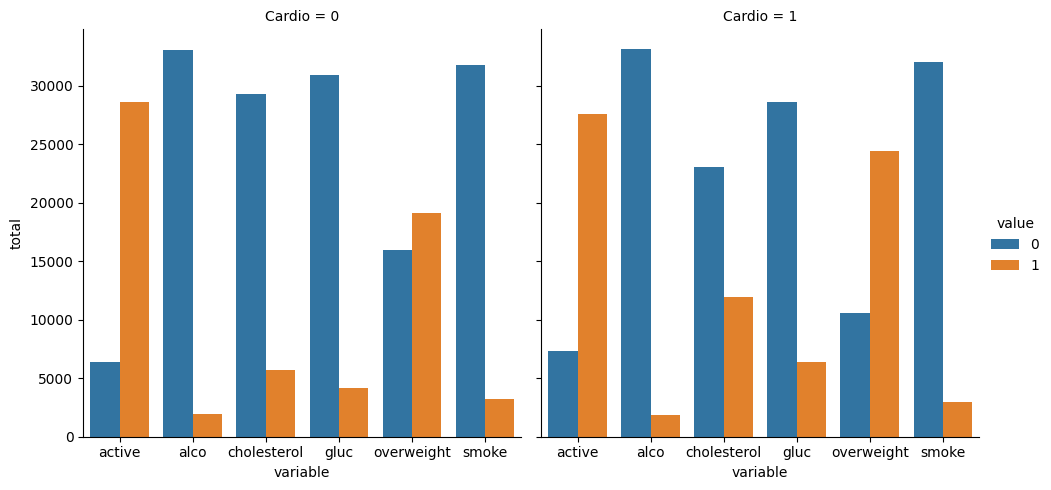

In [9]:
g = sns.catplot(data=df_long, x='variable', hue='value', col='cardio', kind='count')

g.set_axis_labels('variable', 'total')
g.set_titles('Cardio = {col_name}')
plt.show()


In [10]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [11]:
df.shape

(70000, 14)

## Normalizing Data with removing height and weight smaller than 2.5 percentile and greater than 97.5 percentile

In [12]:
df.drop(df[df.ap_lo > df.ap_hi].index, inplace=True)
#(df['ap_lo'] <= df['ap_hi'])
df.shape

(68766, 14)

In [13]:
df = df[df['height'] >= df['height'].quantile(0.025)]
df.shape

(67260, 14)

In [14]:
df = df[df['height'] <= df['height'].quantile(0.975)]
df.shape

(65859, 14)

In [15]:
df = df[(df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]
df.shape

(62784, 14)

In [16]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


## Correlation Matrix of the cleaned data

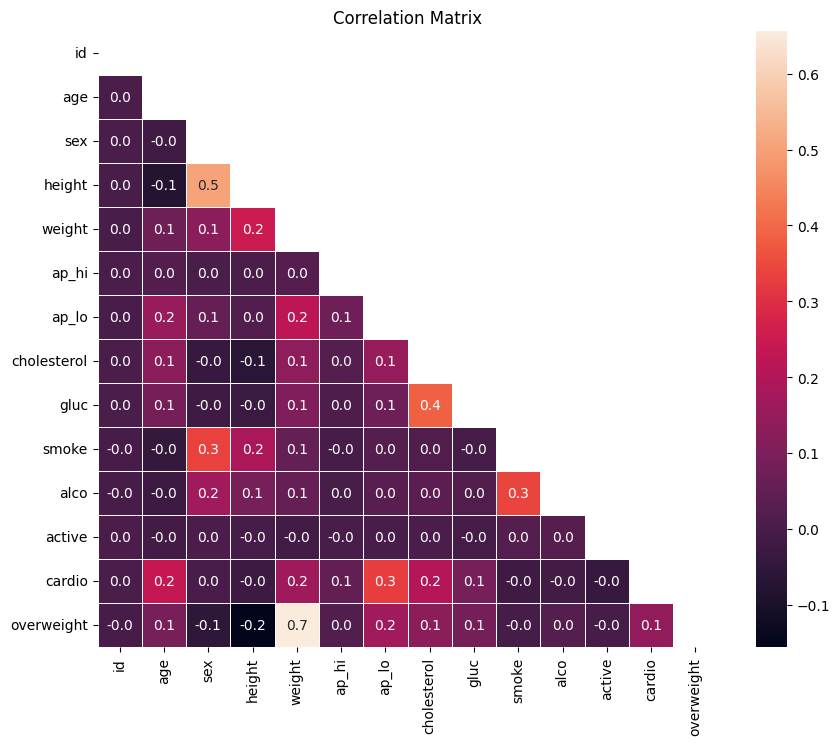

In [17]:
corr= df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".1f", linewidth=.5, mask=mask)

plt.title('Correlation Matrix')

plt.show()